# Define neural networks for classification
We need a neural network with 128 inputs and 10 outputs (one for each audio class). 

For multilabel classifications it is not recommended to use softmax as output layer but sigmoid (https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/)

We've decided to go for **multiclass classification**

### Load training and evaluation sets

In [28]:
from pathlib import Path
import pickle

base_dir = "./features/"

load_file = f"{base_dir}X_train.pkl"
with open(load_file, "rb") as load_file:
    X_train = pickle.load(load_file)
    
load_file = f"{base_dir}y_train.pkl"
with open(load_file, "rb") as load_file:
    y_train = pickle.load(load_file)
    
load_file = f"{base_dir}X_val.pkl"
with open(load_file, "rb") as load_file:
    X_val = pickle.load(load_file)
    
load_file = f"{base_dir}y_val.pkl"
with open(load_file, "rb") as load_file:
    y_val = pickle.load(load_file)

### Load labels

In [29]:
load_file = f"{base_dir}multiLabelBinarizer.pkl"
with open(load_file, "rb") as load_file:
    mlb = pickle.load(load_file)

### Add one dimension to our data for NN

In [31]:
X_train = X_train.reshape(X_train.shape[0], 128, 1)
X_val = X_val.reshape(X_val.shape[0], 128, 1)

## Try Pokemon classification NN


In [32]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

model = Sequential([
    #Conv1D(32, 3, padding="same", input_shape=X_train[0].shape, activation="relu", name="input"),
    Conv1D(128, 3, padding="same", input_shape=X_train[0].shape, activation="relu", name="input"),
    MaxPool1D(pool_size=2, name="maxpool1"),
    
    #Conv1D(64, 3, padding="same", activation="relu", name="conv1D_1"),
    Conv1D(128, 3, padding="same", activation="relu", name="conv1D_1"),
    MaxPool1D(pool_size=2, name="maxpool2"),
    
    #Conv1D(128, 3, padding="same", activation="relu", name="conv1D_2"),
    Conv1D(64, 3, padding="same", activation="relu", name="conv1D_2"),
    MaxPool1D(pool_size=2, name="maxpool3"),
    
    # Conv1D(256, 3, padding="same", activation="relu", name="conv1D_3"),
    # MaxPool1D(pool_size=2, name="maxpool4"),
      
    Flatten(name="flatten"),
    Dense(1024, activation="relu", name="dense"),
    
    Dense(len(mlb.classes_), activation="softmax", name="output")
])

opt = Adam(learning_rate=0.0001)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv1D)              (None, 128, 128)          512       
                                                                 
 maxpool1 (MaxPooling1D)     (None, 64, 128)           0         
                                                                 
 conv1D_1 (Conv1D)           (None, 64, 128)           49280     
                                                                 
 maxpool2 (MaxPooling1D)     (None, 32, 128)           0         
                                                                 
 conv1D_2 (Conv1D)           (None, 32, 64)            24640     
                                                                 
 maxpool3 (MaxPooling1D)     (None, 16, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1024)             

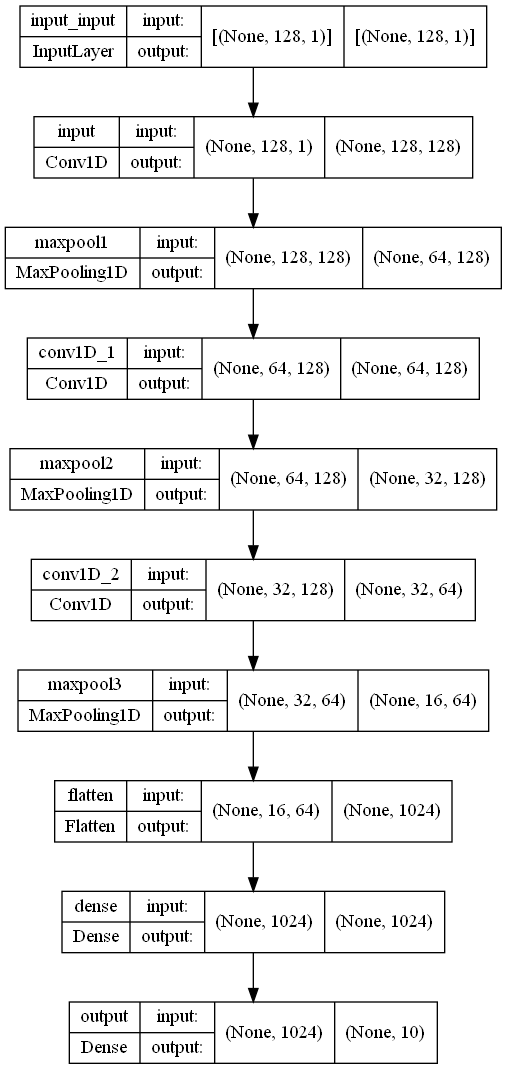

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [34]:
# Compile
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
)

Epoch 1/20
335/335 [==============================] - 6s 16ms/step - loss: 2.4958 - accuracy: 0.4448 - val_loss: 1.6775 - val_accuracy: 0.5011
Epoch 2/20
335/335 [==============================] - 5s 14ms/step - loss: 1.2832 - accuracy: 0.5977 - val_loss: 1.4640 - val_accuracy: 0.5360
Epoch 3/20
335/335 [==============================] - 5s 14ms/step - loss: 1.0923 - accuracy: 0.6448 - val_loss: 1.5042 - val_accuracy: 0.5471
Epoch 4/20
335/335 [==============================] - 4s 13ms/step - loss: 1.0015 - accuracy: 0.6807 - val_loss: 1.6641 - val_accuracy: 0.5361
Epoch 5/20
335/335 [==============================] - 4s 13ms/step - loss: 1.0261 - accuracy: 0.6806 - val_loss: 2.0935 - val_accuracy: 0.5170
Epoch 6/20
335/335 [==============================] - 5s 16ms/step - loss: 1.1702 - accuracy: 0.6661 - val_loss: 2.1196 - val_accuracy: 0.4898
Epoch 7/20
335/335 [==============================] - 15s 45ms/step - loss: 1.5927 - accuracy: 0.6444 - val_loss: 4.6171 - val_accuracy: 0.472

In [35]:
from pathlib import Path
base_dir = "./models/"

Path(base_dir).mkdir(exist_ok=True)

model.save(f"{base_dir}pokemon_model_trained.h5")

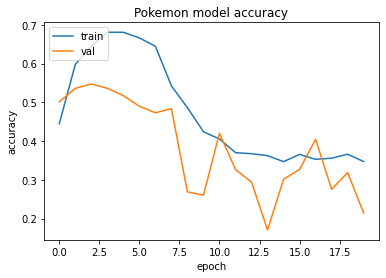

In [36]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Pokemon model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

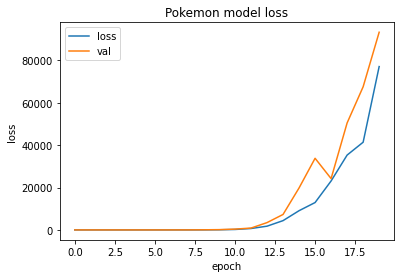

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pokemon model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val'], loc='upper left')
plt.show()

## Neural Network from Keras examples

In [56]:
import keras
from keras import callbacks

keras.backend.clear_session()


def build_and_compile_model():
    inputs = keras.layers.Input(X_train[0].shape, name="embedding")

    x = keras.layers.Dense(256, activation="relu", name="dense_1")(inputs)
    x = keras.layers.Dropout(0.15, name="dropout_1")(x)

    x = keras.layers.Dense(384, activation="relu", name="dense_2")(x)
    x = keras.layers.Dropout(0.2, name="dropout_2")(x)

    x = keras.layers.Dense(192, activation="relu", name="dense_3")(x)
    x = keras.layers.Dropout(0.25, name="dropout_3")(x)

    x = keras.layers.Dense(384, activation="relu", name="dense_4")(x)
    x = keras.layers.Dropout(0.2, name="dropout_4")(x)
    x = keras.layers.Flatten()(x)

    # outputs = keras.layers.Dense(len(selected_classes_indexes), activation="sigmoid", name="ouput")(x)
    # Change to multiclass
    outputs = keras.layers.Dense(len(mlb.classes_), activation="softmax", name="ouput")(x)
    

    model = keras.Model(inputs=inputs, outputs=outputs, name="sound_recognition")

    model.compile(
        optimizer=Adam(learning_rate=1.9644e-5),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy", keras.metrics.AUC(name="auc")],
    )

    return model


model2 = build_and_compile_model()
model2.trainable = True
model2.summary()

Model: "sound_recognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (InputLayer)      [(None, 128, 1)]          0         
                                                                 
 dense_1 (Dense)             (None, 128, 256)          512       
                                                                 
 dropout_1 (Dropout)         (None, 128, 256)          0         
                                                                 
 dense_2 (Dense)             (None, 128, 384)          98688     
                                                                 
 dropout_2 (Dropout)         (None, 128, 384)          0         
                                                                 
 dense_3 (Dense)             (None, 128, 192)          73920     
                                                                 
 dropout_3 (Dropout)         (None, 128, 192)    

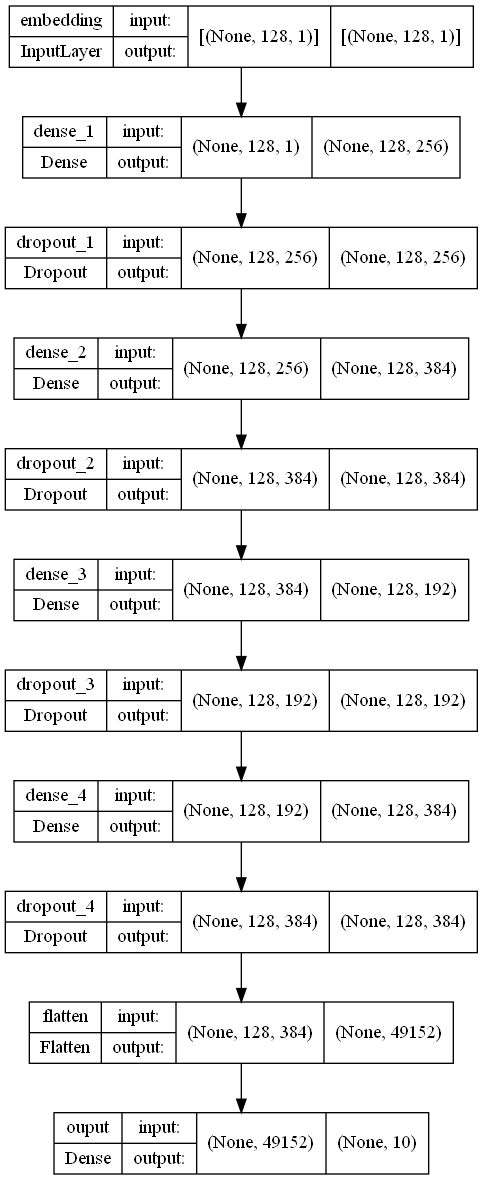

In [57]:
plot_model(model2, show_shapes=True)

In [59]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

history2 = model2.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks =[earlystopping]
)

Epoch 1/100
10697/10697 [==============================] - 389s 36ms/step - loss: 1.3530 - accuracy: 0.5846 - auc: 0.9030 - val_loss: 1.6024 - val_accuracy: 0.5836 - val_auc: 0.9081
Epoch 2/100
10697/10697 [==============================] - 476s 44ms/step - loss: 1.1304 - accuracy: 0.6283 - auc: 0.9286 - val_loss: 1.5643 - val_accuracy: 0.5854 - val_auc: 0.9134
Epoch 3/100
10697/10697 [==============================] - 424s 40ms/step - loss: 1.0854 - accuracy: 0.6378 - auc: 0.9342 - val_loss: 1.2847 - val_accuracy: 0.5964 - val_auc: 0.9231
Epoch 4/100
10697/10697 [==============================] - 416s 39ms/step - loss: 1.0626 - accuracy: 0.6503 - auc: 0.9366 - val_loss: 1.3689 - val_accuracy: 0.5946 - val_auc: 0.9168
Epoch 5/100
10697/10697 [==============================] - 424s 40ms/step - loss: 1.0250 - accuracy: 0.6562 - auc: 0.9410 - val_loss: 1.4956 - val_accuracy: 0.4959 - val_auc: 0.8816
Epoch 6/100
10697/10697 [==============================] - 391s 37ms/step - loss: 1.0054 -

In [60]:
model2.save(f"{base_dir}keras_audio.h5")

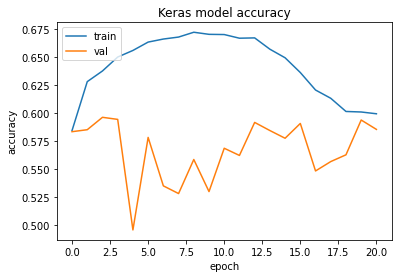

In [61]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Keras model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

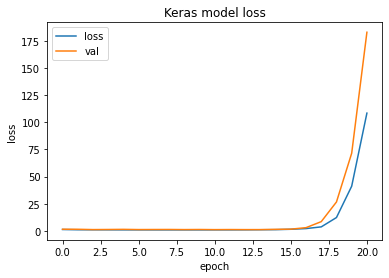

In [62]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Keras model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val'], loc='upper left')
plt.show()

### Same model with different batch size

In [63]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)
history4 = model2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks =[earlystopping]
)

Epoch 1/100
168/168 [==============================] - 8s 48ms/step - loss: 0.9581 - accuracy: 0.6805 - auc: 0.9485 - val_loss: 1.2455 - val_accuracy: 0.5665 - val_auc: 0.9114
Epoch 2/100
168/168 [==============================] - 9s 55ms/step - loss: 0.9406 - accuracy: 0.6833 - auc: 0.9504 - val_loss: 1.2485 - val_accuracy: 0.5643 - val_auc: 0.9110
Epoch 3/100
168/168 [==============================] - 9s 55ms/step - loss: 0.9378 - accuracy: 0.6875 - auc: 0.9507 - val_loss: 1.2458 - val_accuracy: 0.5654 - val_auc: 0.9114
Epoch 4/100
168/168 [==============================] - 10s 57ms/step - loss: 0.9464 - accuracy: 0.6825 - auc: 0.9500 - val_loss: 1.2501 - val_accuracy: 0.5643 - val_auc: 0.9108
Epoch 5/100
168/168 [==============================] - 10s 61ms/step - loss: 0.9442 - accuracy: 0.6874 - auc: 0.9502 - val_loss: 1.2573 - val_accuracy: 0.5613 - val_auc: 0.9097
Epoch 6/100
168/168 [==============================] - 24s 144ms/step - loss: 0.9441 - accuracy: 0.6882 - auc: 0.9499 

In [64]:
model2.save(f"{base_dir}keras_audio_batch64.h5")

### Another model from Keras
https://keras.io/examples/audio/speaker_recognition_using_cnn/

In [53]:
keras.backend.clear_session()

def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2)(x)


def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=X_train[0].shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(len(mlb.classes_), activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs, name="speaker_recognition")


model3 = build_model(X_train[0].shape, len(mlb.classes_))

model3.summary()

# Compile the model using Adam's default learning rate
model3.compile(
    optimizer="Adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"]
)

# Add callbacks:
# 'EarlyStopping' to stop training when the model is not enhancing anymore
# 'ModelCheckPoint' to always keep the model that has the best val_accuracy
model_save_filename = "speaker_model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(
    model_save_filename, monitor="val_accuracy", save_best_only=True
)

Model: "speaker_recognition"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 128, 1)]     0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 128, 16)      64          ['input[0][0]']                  
                                                                                                  
 activation (Activation)        (None, 128, 16)      0           ['conv1d_1[0][0]']               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 128, 16)      784         ['activation[0][0]']             
                                                                                

 conv1d_14 (Conv1D)             (None, 8, 128)       16512       ['max_pooling1d_3[0][0]']        
                                                                                                  
 add_4 (Add)                    (None, 8, 128)       0           ['conv1d_17[0][0]',              
                                                                  'conv1d_14[0][0]']              
                                                                                                  
 activation_12 (Activation)     (None, 8, 128)       0           ['add_4[0][0]']                  
                                                                                                  
 max_pooling1d_4 (MaxPooling1D)  (None, 4, 128)      0           ['activation_12[0][0]']          
                                                                                                  
 average_pooling1d (AveragePool  (None, 1, 128)      0           ['max_pooling1d_4[0][0]']        
 ing1D)   

### DO NOT USE, it doesn't improve results

In [54]:
#history3 = model3.fit(
#    X_train,
#    y_train,
#    batch_size=32,
#    epochs=20,
#    validation_data=(X_val, y_val),
#)

Epoch 1/20
335/335 [==============================] - 29s 68ms/step - loss: 1.9084 - accuracy: 0.4128 - val_loss: 1.4942 - val_accuracy: 0.4757
Epoch 2/20
335/335 [==============================] - 34s 103ms/step - loss: 1.2980 - accuracy: 0.5573 - val_loss: 1.2917 - val_accuracy: 0.5423
Epoch 3/20
335/335 [==============================] - 37s 110ms/step - loss: 1.1851 - accuracy: 0.5972 - val_loss: 1.3931 - val_accuracy: 0.5316
Epoch 4/20
335/335 [==============================] - 36s 107ms/step - loss: 1.4894 - accuracy: 0.5351 - val_loss: 1.4613 - val_accuracy: 0.5065
Epoch 5/20
335/335 [==============================] - 36s 108ms/step - loss: 2.0796 - accuracy: 0.4660 - val_loss: 1.8940 - val_accuracy: 0.3086
Epoch 6/20
335/335 [==============================] - 35s 104ms/step - loss: 2.0402 - accuracy: 0.4373 - val_loss: 2.4017 - val_accuracy: 0.2610
Epoch 7/20
335/335 [==============================] - 19s 58ms/step - loss: 2.2367 - accuracy: 0.3945 - val_loss: 3.9541 - val_accu